<a href="https://colab.research.google.com/github/nithishgade0910/EVoting/blob/main/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3-2sem.zip to 3-2sem.zip


In [ ]:
zip_ref = ZipFile('3-2sem.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_ref = ZipFile('/content/3-2sem.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np

import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
with open('/tmp/shipsnet.json') as data_file:
    dataset = json.load(data_file)

In [ ]:
X = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [ ]:
# Checking the amount of ship and not a ship labels for the images

pd.Series(y).value_counts()

0    3000
1    1000
dtype: int64

In [ ]:
# Identifying the class names

class_names = ['Not A Ship', 'Ship']

In [ ]:
# The current data for each image is one long row of flattened data points representing the RGB values of each pixel

X.shape

(4000, 19200)

In [ ]:
X_reshaped = X.reshape([-1, 3, 80, 80])

X_reshaped.shape

(4000, 3, 80, 80)

In [ ]:
# We need to change the order of the dimensions to get the correct format to plot the images

X_reshaped = X.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

X_reshaped.shape

(4000, 80, 80, 3)

In [ ]:
# The current data for y is a single integer representing the class (1 = ship, 0 = not a ship)

y.shape

(4000,)

In [ ]:
# Converts the data for y to a binary class matrix

y_reshaped = tf.keras.utils.to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [ ]:
# Separating X_reshaped to correspond with the different labels

imgs_0 = X_reshaped[y==0]
imgs_1 = X_reshaped[y==1]

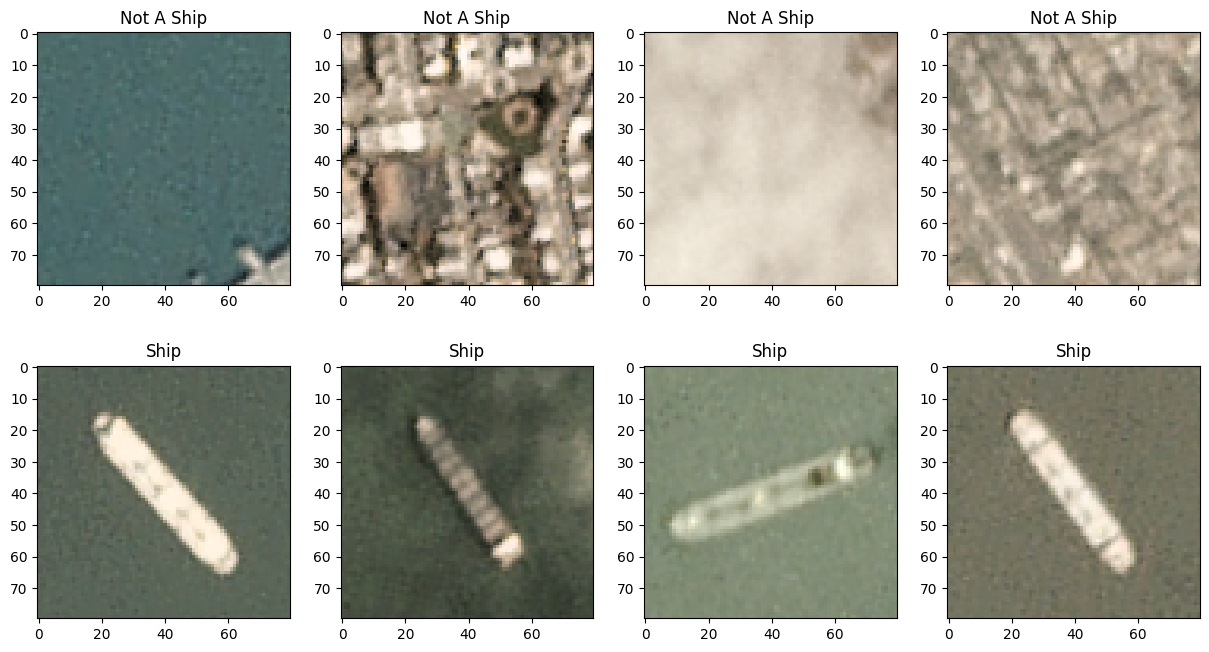

In [ ]:
# Taking a quick look at a the Not a Ship pictures

def plot(a,b):

    plt.figure(figsize=(15, 15))
    plt.subplot(2,4,1)
    plt.title('Not A Ship')
    plt.imshow(a[0])
    plt.subplot(2,4,2)
    plt.title('Not A Ship')
    plt.imshow(a[12])
    plt.subplot(2,4,3)
    plt.title('Not A Ship')
    plt.imshow(a[2])
    plt.subplot(2,4,4)
    plt.title('Not A Ship')
    plt.imshow(a[3])
    plt.subplot(2,4,5)
    plt.title('Ship')
    plt.imshow(b[0])
    plt.subplot(2,4,6)
    plt.title('Ship')
    plt.imshow(b[1])
    plt.subplot(2,4,7)
    plt.title('Ship')
    plt.imshow(b[2])
    plt.subplot(2,4,8)
    plt.title('Ship')
    plt.imshow(b[12])
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

plot(imgs_0, imgs_1)

In [ ]:
# Normalizing the X values

X_reshaped = X_reshaped / 255

In [ ]:
# Doing the initial train/test split on the reshaped values

X_train_full, X_test, y_train_full, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.20, random_state=42)

# Creating the validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(2400, 80, 80, 3)

In [ ]:
y_train.shape

(2400, 2)

In [ ]:
X_val.shape

(800, 80, 80, 3)

In [ ]:
y_val.shape

(800, 2)

In [ ]:
# The loss function still looks like it's going down so testing to see if adding more epochs makes a difference

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
75/75 [==============================] - 2s 25ms/step - loss: 0.1168 - accuracy: 0.9558 - val_loss: 0.1686 - val_accuracy: 0.9413
Epoch 2/20
75/75 [==============================] - 2s 27ms/step - loss: 0.0965 - accuracy: 0.9633 - val_loss: 0.2327 - val_accuracy: 0.9325
Epoch 3/20
75/75 [==============================] - 2s 33ms/step - loss: 0.0908 - accuracy: 0.9679 - val_loss: 0.1755 - val_accuracy: 0.9438
Epoch 4/20
75/75 [==============================] - 2s 24ms/step - loss: 0.1296 - accuracy: 0.9529 - val_loss: 0.2359 - val_accuracy: 0.9137
Epoch 5/20
75/75 [==============================] - 2s 24ms/step - loss: 0.0864 - accuracy: 0.9704 - val_loss: 0.1639 - val_accuracy: 0.9463
Epoch 6/20
75/75 [==============================] - 2s 24ms/step - loss: 0.0819 - accuracy: 0.9667 - val_loss: 0.1651 - val_accuracy: 0.9513
Epoch 7/20
75/75 [==============================] - 2s 24ms/step - loss: 0.0741 - accuracy: 0.9717 - val_loss: 0.2306 - val_accuracy: 0.9250
Epoch 8/20
75

In [ ]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.2112 - accuracy: 0.9262


[0.21118806302547455, 0.9262499809265137]

Text(0, 0.5, 'loss')

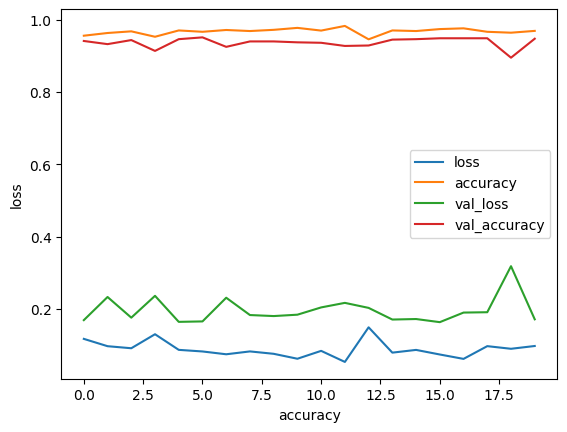

In [ ]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();
plt.xlabel("accuracy")
plt.ylabel("loss")

In [ ]:
# The loss function still looks like it's going down so testing to see if adding more epochs makes a difference

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
75/75 [==============================] - 3s 32ms/step - loss: 0.8876 - accuracy: 0.7821 - val_loss: 0.3333 - val_accuracy: 0.8637
Epoch 2/50
75/75 [==============================] - 2s 25ms/step - loss: 0.4972 - accuracy: 0.8238 - val_loss: 0.3355 - val_accuracy: 0.8662
Epoch 3/50
75/75 [==============================] - 2s 25ms/step - loss: 0.3898 - accuracy: 0.8504 - val_loss: 0.2635 - val_accuracy: 0.8950
Epoch 4/50
75/75 [==============================] - 2s 24ms/step - loss: 0.3196 - accuracy: 0.8771 - val_loss: 0.4904 - val_accuracy: 0.8112
Epoch 5/50
75/75 [==============================] - 2s 24ms/step - loss: 0.3835 - accuracy: 0.8537 - val_loss: 0.2550 - val_accuracy: 0.9025
Epoch 6/50
75/75 [==============================] - 2s 27ms/step - loss: 0.3158 - accuracy: 0.8746 - val_loss: 0.3143 - val_accuracy: 0.8612
Epoch 7/50
75/75 [==============================] - 3s 34ms/step - loss: 0.2657 - accuracy: 0.8983 - val_loss: 0.2305 - val_accuracy: 0.9175
Epoch 8/50
75

In [ ]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 8ms/step - loss: 0.3192 - accuracy: 0.8750


[0.31920599937438965, 0.875]

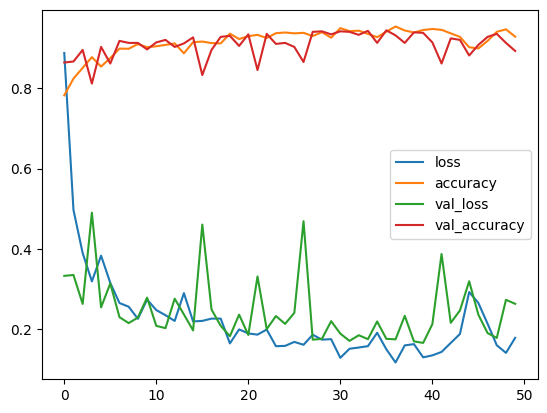

In [ ]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

Adding More Layers + Softmax Activation

In [ ]:
# Trying out more layers to see if we can get it even higher and adding in the softmax function for more interpretability

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
75/75 [==============================] - 3s 27ms/step - loss: 0.6185 - accuracy: 0.7908 - val_loss: 0.3425 - val_accuracy: 0.8800
Epoch 2/50
75/75 [==============================] - 2s 25ms/step - loss: 0.3958 - accuracy: 0.8367 - val_loss: 0.4096 - val_accuracy: 0.8313
Epoch 3/50
75/75 [==============================] - 2s 25ms/step - loss: 0.3588 - accuracy: 0.8571 - val_loss: 0.2834 - val_accuracy: 0.8850
Epoch 4/50
75/75 [==============================] - 2s 25ms/step - loss: 0.2884 - accuracy: 0.8800 - val_loss: 0.2677 - val_accuracy: 0.8900
Epoch 5/50
75/75 [==============================] - 2s 32ms/step - loss: 0.3069 - accuracy: 0.8800 - val_loss: 0.2601 - val_accuracy: 0.8963
Epoch 6/50
75/75 [==============================] - 2s 32ms/step - loss: 0.2853 - accuracy: 0.8888 - val_loss: 0.2353 - val_accuracy: 0.9112
Epoch 7/50
75/75 [==============================] - 2s 31ms/step - loss: 0.2482 - accuracy: 0.9000 - val_loss: 0.2333 - val_accuracy: 0.9062
Epoch 8/50
75

In [ ]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9325


[0.2117517590522766, 0.9325000047683716]

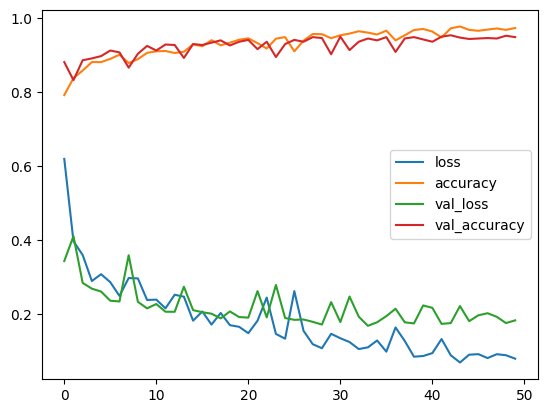

In [ ]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

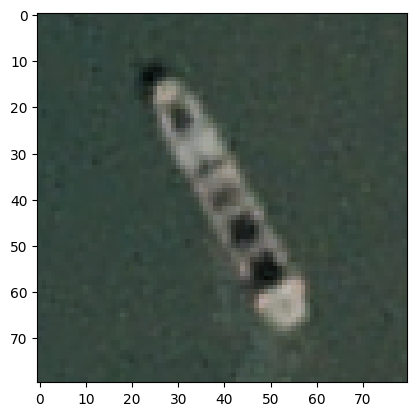

In [ ]:
# Looks like a ship to me!

plt.imshow(X_test[0])

In [ ]:
# Finding the percentage predictions for each item in the test set

y_pred = model.predict(X_test)

25/25 [==============================] - 0s 6ms/step


In [ ]:
# Taking a look at the first prediction

pd.Series(y_pred[0], index=class_names)

Not A Ship    0.283243
Ship          0.787430
dtype: float32

In [ ]:
# Putting all of the predictions in a dataFrame

df = pd.DataFrame(y_pred, columns=class_names)

df = df.round(6)

df

,Not A Ship,Ship
0,0.283243,0.787430
1,0.951166,0.031494
2,0.085669,0.951832
3,0.092388,0.947146
4,0.998262,0.048552
...,...,...
795,0.721477,0.308231
796,0.088846,0.949628
797,0.911695,0.111387
798,0.979144,0.009854


import numpy as np
from google.colab import autoviz
df_2560404888404567013 = autoviz.get_registered_df('df_2560404888404567013')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2560404888404567013, *['Not A Ship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2560404888404567013 = autoviz.get_registered_df('df_2560404888404567013')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2560404888404567013, *['Ship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2560404888404567013 = autoviz.get_registered_df('df_2560404888404567013')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2560404888404567013, *['Not A Ship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2560404888404567013 = autoviz.get_registered_df('df_2560404888404567013')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2560404888404567013, *['Ship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2560404888404567013 = autoviz.get_registered_df('df_2560404888404567013')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2560404888404567013, *[[['Not A Ship', 'Ship']]], **{})
chart

In [ ]:
# Adding the information from y_test to the predictions dataFrame

df['Test is a Ship'] = y_test[:, 1]

df

,Not A Ship,Ship,Test is a Ship
0,0.283243,0.787430,1.0
1,0.951166,0.031494,0.0
2,0.085669,0.951832,1.0
3,0.092388,0.947146,0.0
4,0.998262,0.048552,0.0
...,...,...,...
795,0.721477,0.308231,0.0
796,0.088846,0.949628,1.0
797,0.911695,0.111387,0.0
798,0.979144,0.009854,0.0


In [ ]:
# Finding the images where the model was the most certain that is wasn't a ship when it was

df['Difference'] = df['Ship'] - df['Test is a Ship']

df.sort_values('Difference', ascending=True).head(10)

,Not A Ship,Ship,Test is a Ship,Difference
537,0.971681,0.016942,1.0,-0.983058
518,0.861053,0.081906,1.0,-0.918094
365,0.905244,0.118432,1.0,-0.881568
578,0.895759,0.124734,1.0,-0.875266
322,0.860968,0.169850,1.0,-0.830150
247,0.851216,0.216507,1.0,-0.783493
363,0.787528,0.248245,1.0,-0.751755
47,0.755715,0.271571,1.0,-0.728429
249,0.717436,0.312696,1.0,-0.687304
100,0.697910,0.359104,1.0,-0.640896


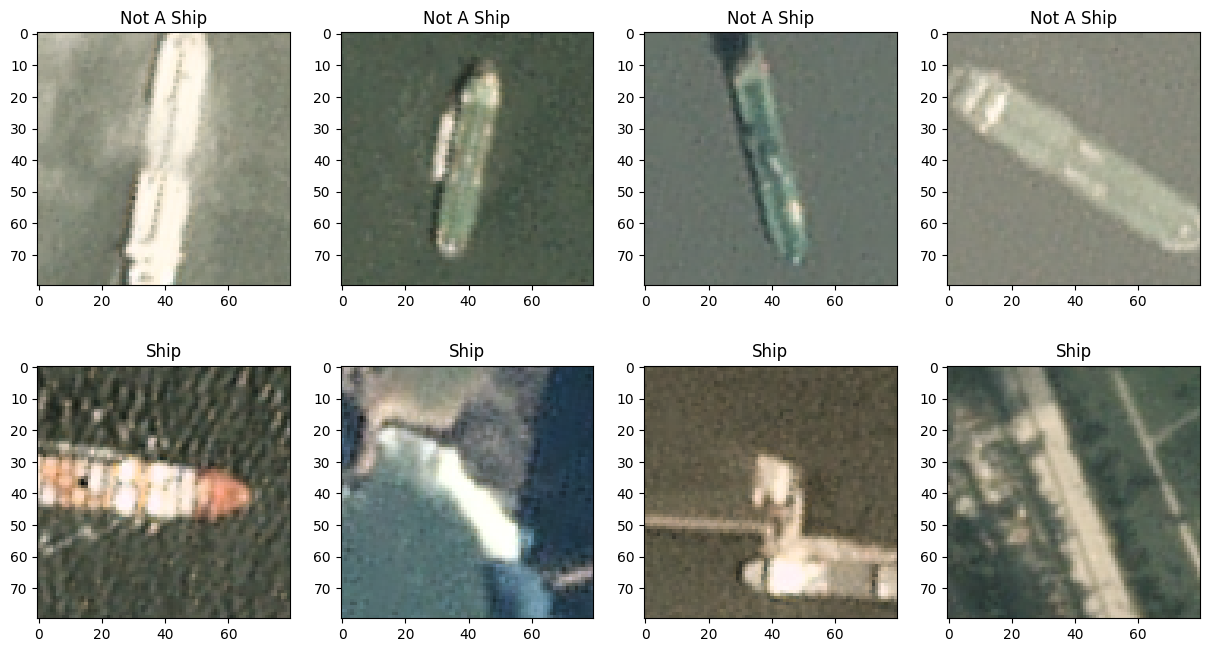

In [ ]:
# Plotting the top 4 from each incorrect guess

plt.figure(figsize=(15, 15))
plt.subplot(2,4,1)
plt.title('Not A Ship')
plt.imshow(X_test[537])
plt.subplot(2,4,2)
plt.title('Not A Ship')
plt.imshow(X_test[518])
plt.subplot(2,4,3)
plt.title('Not A Ship')
plt.imshow(X_test[322])
plt.subplot(2,4,4)
plt.title('Not A Ship')
plt.imshow(X_test[206])
plt.subplot(2,4,5)
plt.title('Ship')
plt.imshow(X_test[528])
plt.subplot(2,4,6)
plt.title('Ship')
plt.imshow(X_test[628])
plt.subplot(2,4,7)
plt.title('Ship')
plt.imshow(X_test[662])
plt.subplot(2,4,8)
plt.title('Ship')
plt.imshow(X_test[3])
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

In [ ]:
# Plotting a histogram plot of the pixel intensities to see if I can spot a common pattern as to why they are misclassifying
# those images as ships

def plotHistogram(a):

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('Ship' if y[1] else 'Not A Ship')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

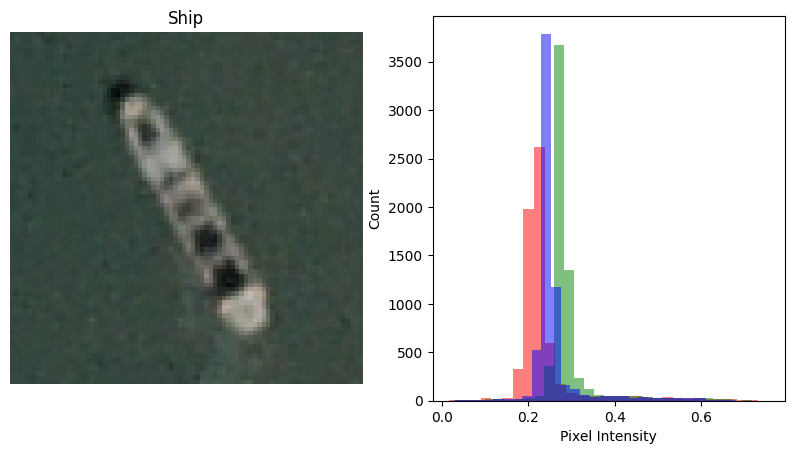

In [ ]:
plotHistogram(X_test[0])

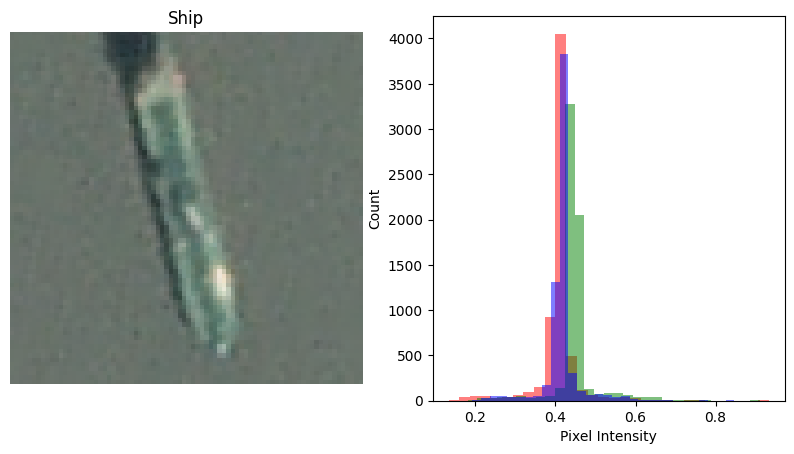

In [ ]:
plotHistogram(X_test[322])

Trying a Convolutional Neural Network Model

In [ ]:
# Using a 3x3 kernel and a pooling size of 2x2 at the start of the sequence

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
75/75 [==============================] - 9s 115ms/step - loss: 0.3505 - accuracy: 0.8625 - val_loss: 0.1787 - val_accuracy: 0.9250
Epoch 2/20
75/75 [==============================] - 10s 131ms/step - loss: 0.1671 - accuracy: 0.9358 - val_loss: 0.3091 - val_accuracy: 0.8763
Epoch 3/20
75/75 [==============================] - 10s 139ms/step - loss: 0.1344 - accuracy: 0.9492 - val_loss: 0.1766 - val_accuracy: 0.9325
Epoch 4/20
75/75 [==============================] - 10s 131ms/step - loss: 0.1127 - accuracy: 0.9546 - val_loss: 0.1204 - val_accuracy: 0.9600
Epoch 5/20
75/75 [==============================] - 8s 113ms/step - loss: 0.0771 - accuracy: 0.9733 - val_loss: 0.1059 - val_accuracy: 0.9613
Epoch 6/20
75/75 [==============================] - 9s 123ms/step - loss: 0.0697 - accuracy: 0.9750 - val_loss: 0.1612 - val_accuracy: 0.9475
Epoch 7/20
75/75 [==============================] - 9s 123ms/step - loss: 0.0515 - accuracy: 0.9825 - val_loss: 0.1182 - val_accuracy: 0.9700
Epo

In [ ]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 31ms/step - loss: 0.1512 - accuracy: 0.9725


[0.1511852741241455, 0.9725000262260437]

Adding Another Convolution and Pooling Layer

In [ ]:
# Using a 5x5 kernel and a pooling size of 3x3 at the start of the sequence

# Increasing the number of nodes in the first convolution layer

# Increasing the pool size in the first pool layer

model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
75/75 [==============================] - 19s 248ms/step - loss: 0.4146 - accuracy: 0.8258 - val_loss: 0.3127 - val_accuracy: 0.8850
Epoch 2/20
75/75 [==============================] - 19s 256ms/step - loss: 0.2250 - accuracy: 0.9083 - val_loss: 0.1865 - val_accuracy: 0.9250
Epoch 3/20
75/75 [==============================] - 18s 245ms/step - loss: 0.1650 - accuracy: 0.9296 - val_loss: 0.1807 - val_accuracy: 0.9312
Epoch 4/20
75/75 [==============================] - 19s 254ms/step - loss: 0.1321 - accuracy: 0.9508 - val_loss: 0.1471 - val_accuracy: 0.9475
Epoch 5/20
75/75 [==============================] - 19s 251ms/step - loss: 0.1057 - accuracy: 0.9621 - val_loss: 0.1156 - val_accuracy: 0.9538
Epoch 6/20
75/75 [==============================] - 18s 238ms/step - loss: 0.0696 - accuracy: 0.9754 - val_loss: 0.1469 - val_accuracy: 0.9525
Epoch 7/20
75/75 [==============================] - 20s 270ms/step - loss: 0.0946 - accuracy: 0.9642 - val_loss: 0.0969 - val_accuracy: 0.9638

Text(0, 0.5, 'loss')

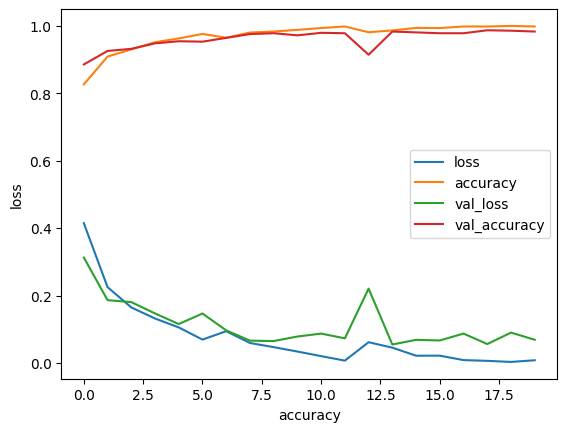

In [ ]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();
plt.xlabel("accuracy")
plt.ylabel("loss")

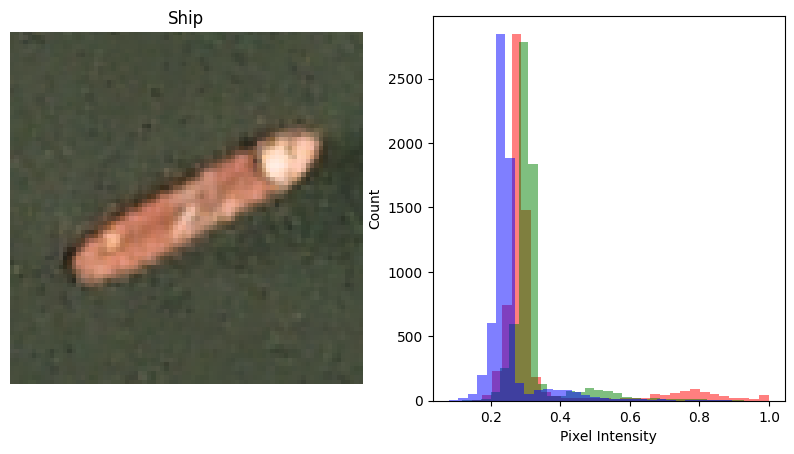

In [ ]:
plotHistogram(X_test[2])

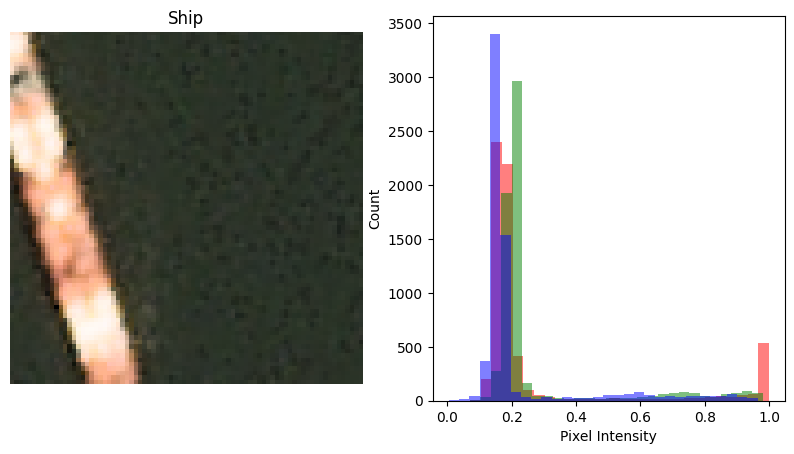

In [ ]:
plotHistogram(X_test[4])

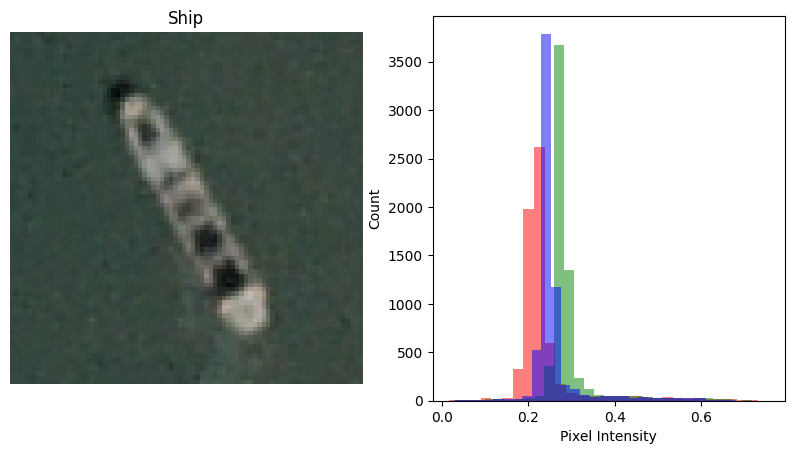

In [ ]:
plotHistogram(X_test[0])